# **Task 2 : Prediction using Unsupervised ML**
# **Notebook by Mandy D'mello**


In this task, we will predict the optimum number of clusters from the given iris dataset and represent it visually.                                         
This will be done using unsupervised learning.                                                                                                             
                                                            The dataset used for this can be found at - https://bit.ly/3kXTdox

## **Step 1 : Importing the libraries**

In [ ]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

## **Step 2 : Loading the dataset**

In [ ]:
# Loading and Reading the iris dataset
df = pd.read_csv('C:/Downloads/Iris.csv')

## **Step 3 : Data Understanding**

In [ ]:
# loads the first 5 rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# loads the last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# checking for duplicate data
df.duplicated().sum()

0

In [ ]:
# checking statistical description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# checking for unique species and their counts
df.Species.nunique()
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## **Step 4 : Data Visualization**

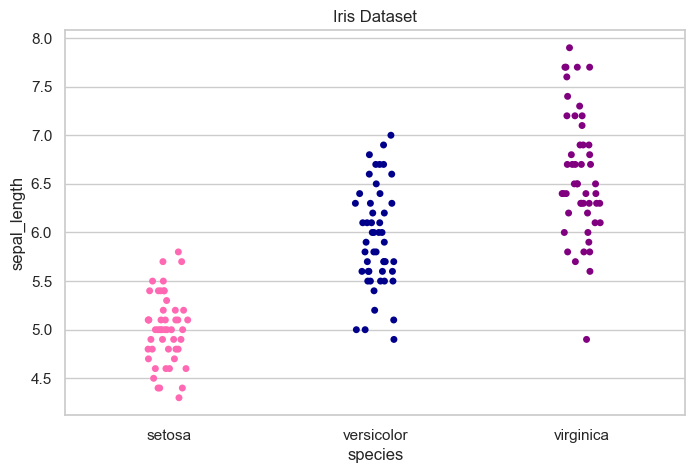

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 5))
iris = sns.load_dataset('iris')
colors = ["hotpink", "#00008B", "#800080"]
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris, palette=colors)
plt.title('Iris Dataset')
plt.show()

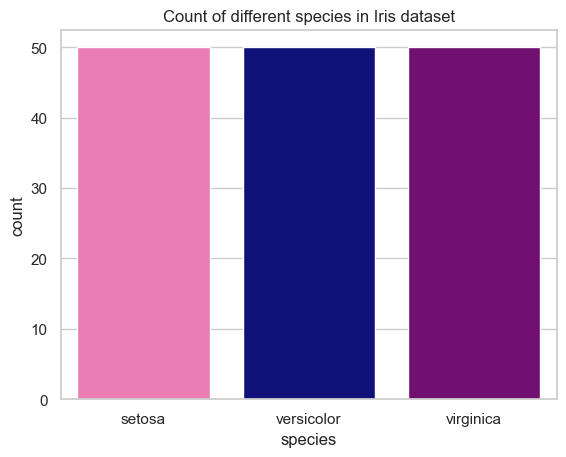

In [ ]:
# Count plot
sns.countplot(x='species', data=iris, palette=colors)
plt.title("Count of different species in Iris dataset")
plt.show()

## **Step 5 : Finding the optimum number of clusters using k-means clustering**

Two methods can be useful to find k in k-means.                                                                        
* *The Elbow Method:* Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids.
* *The Silhouette Method:* The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

### **The Elbow method**

In [ ]:
iris_data = df.iloc[:,[1,2,3,4]].values
# function returns WSS score for k values from 1 to 10
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_data)
    ## appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 680.8244
k: 2 wcss: 152.36870647733906
k: 3 wcss: 78.94084142614602
k: 4 wcss: 57.31787321428571
k: 5 wcss: 46.535582051282056
k: 6 wcss: 38.930963049671746
k: 7 wcss: 34.19698216257427
k: 8 wcss: 30.083825236167343
k: 9 wcss: 28.032802662999597
k: 10 wcss: 26.08181818181818


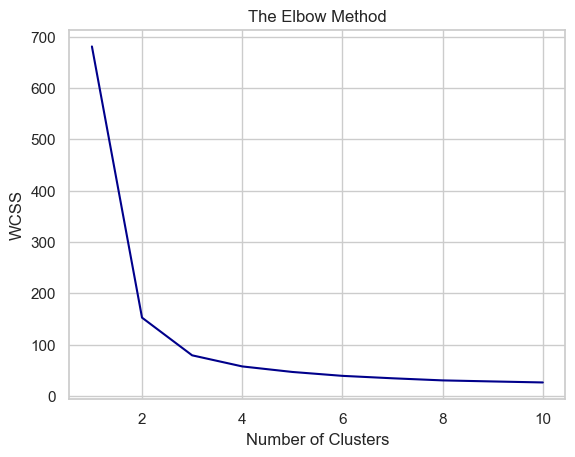

In [ ]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss,color="#00008B")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### The Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score
sil = []
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(iris_data)
    labels = kmeans.labels_
    sil.append(silhouette_score(iris_data, labels, metric = 'euclidean'))
print(sil)


[0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.4885175508886279, 0.36820569682713084, 0.3600597997328459, 0.3631969081840424, 0.344397970893546, 0.31580076609559027]


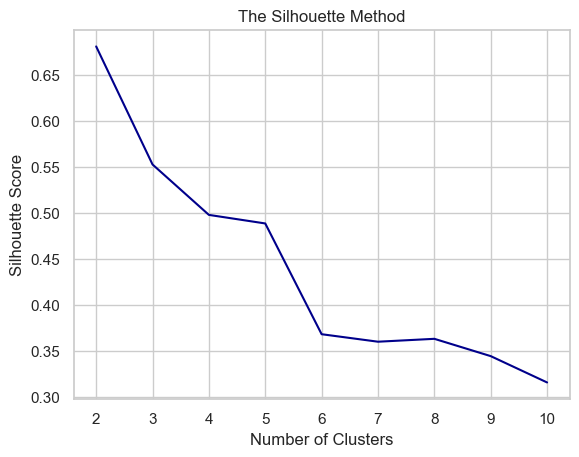

In [ ]:
plt.plot(range(2, 11), sil,color="#00008B")
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**From The Elbow Method we can see that after 3 the drop in WCSS is minimal. And from the Silhouette Methdos we can see the Max Score 3. So we choose 3 as the optimal number of clusters.**

## **Step 6 : Initializing K-Means With Optimum Number Of Clusters**

In [ ]:
# Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(iris_data)

## **Step 7 : Predicting Values**

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## **Step 8 : Visualizing the Clusters**

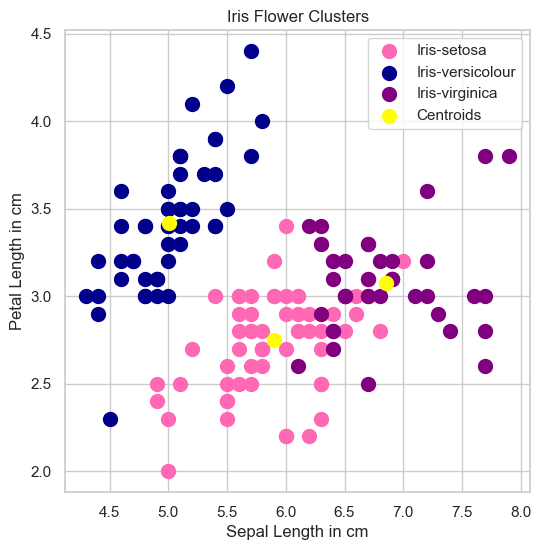

In [ ]:
# Visualising the clusters
colors = ["Violet", "#00008B", "#800080"]
plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,color='hotpink',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,color='#00008B',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,color='#800080',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

k-means clustering is a simplest and popular unsupervised machine learning algorithm.  
The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.                                                                                   
Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal k, rather they are tools to be used together for a more confident decision.